<a href="https://colab.research.google.com/github/ShaileeYadav/Sentiment-Analysis-of-Tweets-Using-ML/blob/main/Sentimental_Analysis_for_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_tweets3.csv to sentiment_tweets3.csv


In [2]:
import pandas as pd
import numpy as np

In [5]:
# Load the dataset from a CSV file
df = pd.read_csv('sentiment_tweets3.csv')

In [6]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [8]:
# checking null vallues
df.isna().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

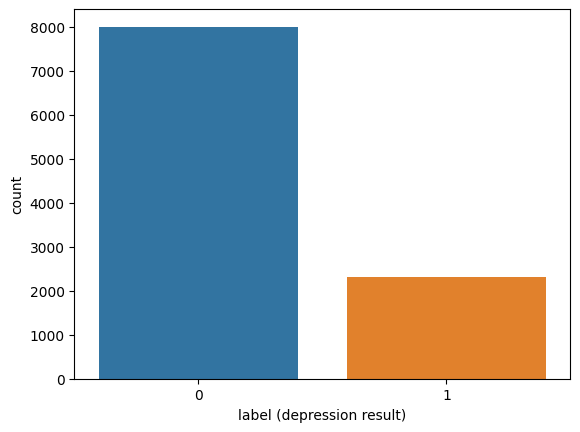

In [10]:
sns.countplot(x='label (depression result)',data= df)
plt.show()

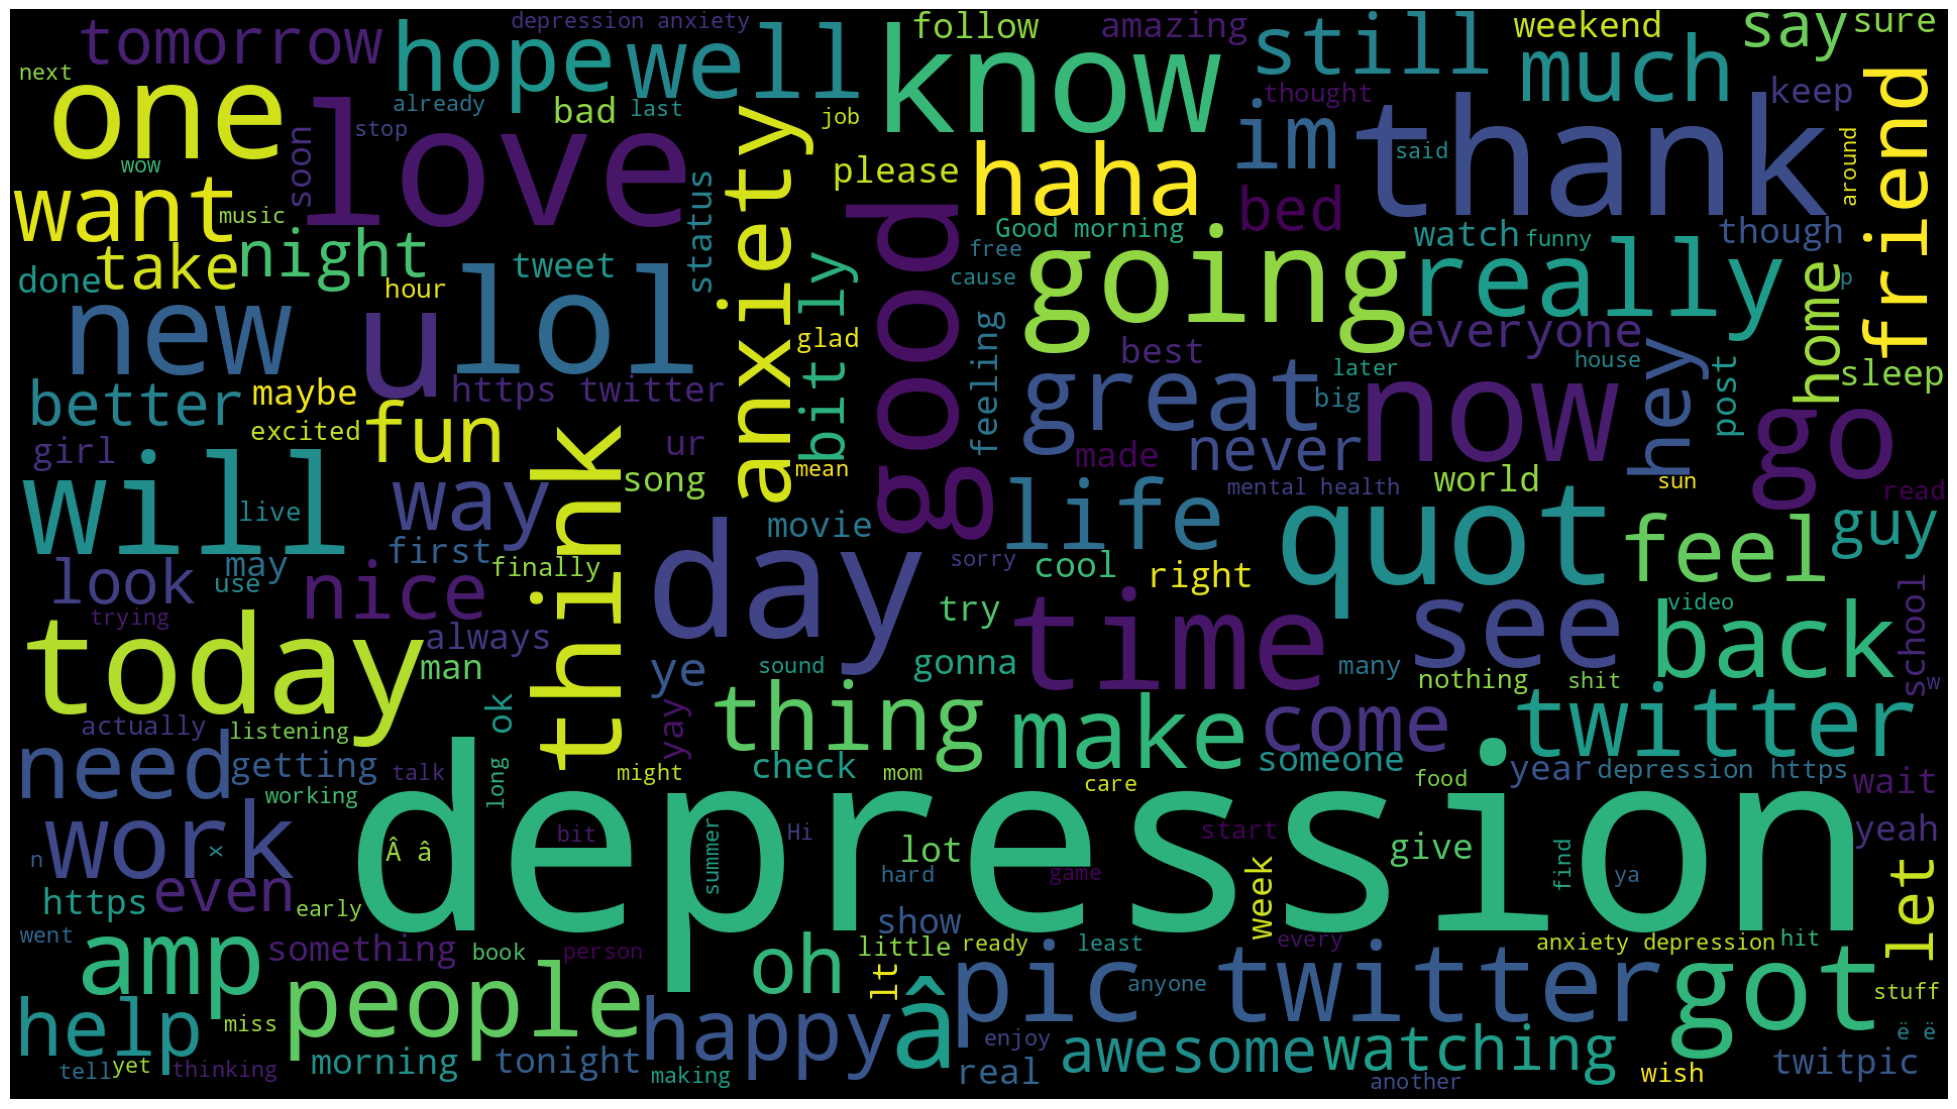

In [11]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(df['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Removing Punctuations

In [14]:
import re
pattern = r"[^\w\s]"
df['Punctuation'] = df['message to examine'].apply(lambda x: re.sub(pattern, " ", x))
df

,Index,message to examine,label (depression result),Punctuation
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...


Removing URL's

In [15]:
def remove_urls(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

df['urlsRemoved'] = df['Punctuation'].apply(remove_urls)
df

,Index,message to examine,label (depression result),Punctuation,urlsRemoved
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...,just had a real good moment i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e,is reading manga http plurk com p mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http ...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...,lapcat Need to send em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...,dont mistake a bad day with depression everyo...


Removing Emoji

In [16]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

df['emojiRemoved'] = df['urlsRemoved'].apply(remove_emoji)
df

,Index,message to examine,label (depression result),Punctuation,urlsRemoved,emojiRemoved
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...,just had a real good moment i missssssssss hi...,just had a real good moment i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e,is reading manga http plurk com p mzp1e,is reading manga http plurk com p mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http ...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need to send em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...,dont mistake a bad day with depression everyo...,dont mistake a bad day with depression everyo...


Removing Stopwords

In [17]:
STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['stopWord_Removed'] = df['emojiRemoved'].apply(stopwords)
df

,Index,message to examine,label (depression result),Punctuation,urlsRemoved,emojiRemoved,stopWord_Removed
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...,just had a real good moment i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e,is reading manga http plurk com p mzp1e,is reading manga http plurk com p mzp1e,reading manga http plurk com p mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http www y...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression G Herbo mood done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What depression succumbs brain makes feel like...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...,dont mistake a bad day with depression everyo...,dont mistake a bad day with depression everyo...,dont mistake bad day depression everyone em


Lemmatization

In [18]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['lemmatizedRows'] = df['stopWord_Removed'].apply(lemmatizeRows)
df

,Index,message to examine,label (depression result),Punctuation,urlsRemoved,emojiRemoved,stopWord_Removed,lemmatizedRows
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...,just had a real good moment i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e,is reading manga http plurk com p mzp1e,is reading manga http plurk com p mzp1e,reading manga http plurk com p mzp1e,reading manga http plurk com p mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http ...,comeagainjen http twitpic com 2y2lx http www y...,comeagainjen http twitpic com 2y2lx http www y...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...,lapcat Need send em accountant tomorrow Oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression G Herbo mood done stressing peop...,No Depression G Herbo mood done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What depression succumbs brain makes feel like...,What depression succumbs brain make feel like ...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...,dont mistake a bad day with depression everyo...,dont mistake a bad day with depression everyo...,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em


In [19]:
columns_to_drop = ['message to examine', 'Punctuation', 'urlsRemoved', 'emojiRemoved', 'stopWord_Removed']
df = df.drop(columns_to_drop, axis=1)

In [20]:
df

,Index,label (depression result),lemmatizedRows
0,106,0,real good moment miss much
1,217,0,reading manga http plurk com p mzp1e
2,220,0,comeagainjen http twitpic com 2y2lx http www y...
3,288,0,lapcat Need send em accountant tomorrow Oddly ...
4,540,0,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...
10309,802309,1,No Depression G Herbo mood done stressing peop...
10310,802310,1,What depression succumbs brain make feel like ...
10311,802311,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,1,dont mistake bad day depression everyone em


In [21]:
new_column_name = {'lemmatizedRows': 'message to examine'}
df = df.rename(columns=new_column_name)

In [22]:
df

,Index,label (depression result),message to examine
0,106,0,real good moment miss much
1,217,0,reading manga http plurk com p mzp1e
2,220,0,comeagainjen http twitpic com 2y2lx http www y...
3,288,0,lapcat Need send em accountant tomorrow Oddly ...
4,540,0,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...
10309,802309,1,No Depression G Herbo mood done stressing peop...
10310,802310,1,What depression succumbs brain make feel like ...
10311,802311,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,1,dont mistake bad day depression everyone em


In [23]:
message= df['message to examine'].tolist()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [25]:
# Initialize the vectorizer (choose CountVectorizer or TfidfVectorizer)
vectorizer = TfidfVectorizer()

# Perform vectorization
vectorizer.fit(message)

#Transforming the data
Text_tf = vectorizer.transform(message).toarray()

In [26]:
Text_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#Splitting dataset
X_train = Text_tf[:8000]
X_test = Text_tf[8000:]
y_train = df["label (depression result)"].iloc[:8000]
y_test = df["label (depression result)"].iloc[8000:]

In [29]:
# Extract the features (X) and labels (y)
X = Text_tf
y = df['label (depression result)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Fitting all the Models**

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9791565681047019
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1614
           1       1.00      0.90      0.95       449

    accuracy                           0.98      2063
   macro avg       0.99      0.95      0.97      2063
weighted avg       0.98      0.98      0.98      2063



Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9103247697527872
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1614
           1       0.99      0.59      0.74       449

    accuracy                           0.91      2063
   macro avg       0.95      0.80      0.84      2063
weighted avg       0.92      0.91      0.90      2063



Support Vector Machines (SVM)

In [34]:
from sklearn.svm import SVC

In [35]:
# Initialize the SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9941832283082889
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1614
           1       1.00      0.97      0.99       449

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9365002423654871
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1614
           1       0.78      0.99      0.87       449

    accuracy                           0.94      2063
   macro avg       0.89      0.95      0.91      2063
weighted avg       0.95      0.94      0.94      2063



Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Initialize the Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9486185167232186
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1614
           1       0.82      0.98      0.89       449

    accuracy                           0.95      2063
   macro avg       0.91      0.96      0.93      2063
weighted avg       0.96      0.95      0.95      2063

